1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted Class: cardboard
Probability: 0.99


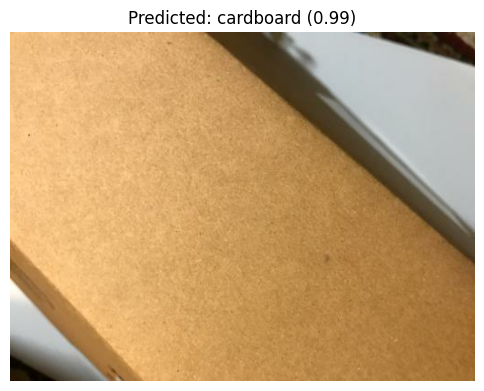

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('/content/My Final Model.h5')

# Path to the image you want to test (change the path to the image on your system)
test_img_path = '/content/6.jpg'

# Load and preprocess the image using TensorFlow
img = tf.io.read_file(test_img_path)  # Read the image file
img = tf.image.decode_image(img)  # Decode the image
original_img = img.numpy()  # Convert to numpy array for display

# Resize the image to the input size expected by your model (32x32)
img = tf.image.resize(img, [32, 32])
img = img / 255.0  # Normalize pixel values

# Add batch dimension (1, 32, 32, 3)
img_array = tf.expand_dims(img, axis=0)

# Make predictions
predictions = model.predict(img_array)

# Assuming `number_to_class` is a list that maps predicted indices to class names
number_to_class = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Get the predicted class index and probability
predicted_class_index = np.argmax(predictions[0], axis=-1)
predicted_probability = np.max(predictions[0])  # Highest probability

# Get the predicted class name
predicted_class = number_to_class[predicted_class_index]

# Print the predicted class and probability
print(f"Predicted Class: {predicted_class}")
print(f"Probability: {predicted_probability:.2f}")

# Display the original image with its predicted class and probability
plt.figure(figsize=(6, 6))
plt.imshow(original_img)  # Display the original image
plt.title(f"Predicted: {predicted_class} ({predicted_probability:.2f})")
plt.axis('off')
plt.show()
